***

# <font color=blue>Created by: Valentino Gaffuri Bedetta</font>

# <font color=blue>On date 20-03-2019</font>

# <font color=blue>Game Of Thrones Analisys</font>

<br>

***

## Challenge
There are approximately 2,000 characters in A Song of Ice and Fire by George R.R. Martin. This book series was the inspiration for the HBO series Game of Thrones. The tasks here are to predict which characters in the series will live or die, and give data-driven recommendations on how to survive in Game of Thrones.

***

## GOT Dictonary
S.No =	Character number (by order of appearance)

name =	Character name

title =	Honorary title(s) given to each character

male =	1 = male, 0 = female

culture =	Indicates the cultural group of a character

dateOfBirth =	Known dates of birth for each character (measurement unknown)

mother =	Character's biological mother

father =	Character's biological father

heir =	Character's biological heir

house =	Indicates a character's allegiance to a house (i.e. a powerful family)

spouse =	Character's spouse(s)

book1_A_Game_Of_Thrones =	1 = appeared in book, 0 = did not appear in book

book2_A_Clash_Of_Kings =	1 = appeared in book, 0 = did not appear in book

book3_A_Storm_Of_Swords =	1 = appeared in book, 0 = did not appear in book

book4_A_Feast_For_Crows =	1 = appeared in book, 0 = did not appear in book

book5_A_Dance_with_Dragons =	1 = appeared in book, 0 = did not appear in book

isAliveMother =	1 = alive, 0 = not alive

isAliveFather =	1 = alive, 0 = not alive

isAliveHeir =	1 = alive, 0 = not alive

isAliveSpouse =	1 = alive, 0 = not alive

isMarried =	1 = married, 0 = not married

isNoble =	1 = noble, 0 = not noble

age =	Character's age in years

numDeadRelations =	Total number of deceased relatives throughout all of the books

popularity =	Indicates the popularity of a character (1 = extremely popular (max), 0 = extremely unpopular (min))

isAlive =	1 = alive, 0 = not alive

In [758]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split # train/test split
from sklearn.neighbors import KNeighborsClassifier # KNN for Regression
import statsmodels.formula.api as smf # regression modeling
import sklearn.metrics # more metrics for model performance evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)



In [ ]:
# Import data
file = 'GOT_character_predictions.xlsx'
got = pd.read_excel(file)

***

# Exploratory analysis of the dataset

In [618]:
# Column names
got.columns


# Displaying the first rows of the DataFrame
print(got.head())


# Dimensions of the DataFrame
got.shape


# Information about each variable
got.info()


# Descriptive statistics
got.describe().round(2)

   S.No           name title  male              culture  dateOfBirth mother  \
0  1739   Imry Florent   Ser     1                  NaN          NaN    NaN   
1  1233  Merianne Frey   NaN     0                  NaN        288.0    NaN   
2   998           Dolf   NaN     0  Vale mountain clans          NaN    NaN   
3    64          Quill   NaN     1             Braavosi          NaN    NaN   
4   334          Bandy   NaN     0             Northmen          NaN    NaN   

  father heir          house spouse  book1_A_Game_Of_Thrones  \
0    NaN  NaN  House Florent    NaN                        0   
1    NaN  NaN     House Frey    NaN                        0   
2    NaN  NaN    Stone Crows    NaN                        1   
3    NaN  NaN            NaN    NaN                        0   
4    NaN  NaN    House Stark    NaN                        0   

   book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  \
0                       1                        1           

,S.No,male,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1946.00,1946.00,433.00,1946.0,1946.00,1946.00,1946.00,1946.00,21.00,26.00,23.00,276.00,1946.00,1946.00,433.00,1946.00,1946.00,1946.00
mean,973.50,0.62,1577.36,0.2,0.37,0.48,0.59,0.40,0.71,0.19,0.65,0.78,0.14,0.46,-1293.56,0.31,0.09,0.75
std,561.91,0.49,19565.41,0.4,0.48,0.50,0.49,0.49,0.46,0.40,0.49,0.42,0.35,0.50,19564.34,1.38,0.16,0.44
min,1.00,0.00,-28.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00,0.00
25%,487.25,0.00,240.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,18.00,0.00,0.01,0.00
50%,973.50,1.00,268.00,0.0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,27.00,0.00,0.03,1.00
75%,1459.75,1.00,285.00,0.0,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,50.00,0.00,0.09,1.00
max,1946.00,1.00,298299.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,15.00,1.00,1.00


***We have many variables with missing values.<br>
Also remember that the cariable we need to predict is isAlive, that is if the character is still alive***
<br>

#### Now let's focus on the variables with missing values

In [619]:
# Variables with missing values
# Total of missing values
print(got
      .isnull()
      .sum()
      .sum()
)

# Missing values per column
print(got
      .isnull()
      .sum()
)

20606
S.No                             0
name                             0
title                         1008
male                             0
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64


***Here we can see that we have a big problem with missing values.<br>
Some of them are manageable, but other, really dificult, with a lot of missing values inside, almost every value is missing.***

#### Let's check some individual variables
Let's start with the one we want to predict: isAlive

In [620]:
# Type of values in the variable
got['isAlive'].unique()

array([0, 1])

***We have 0 and 1, boolean***

In [621]:
# Now let's count the values
got['isAlive'].value_counts()

1    1451
0     495
Name: isAlive, dtype: int64

***Here we can see that there could be a bias in the data because there a lot less of 1 (alive) examples, this can be harder to predict in the future.***

#### Let's check other variables than aren't numerical, that are categorical and seems to be relevant

In [622]:
# Let's check first culture
got['culture'].unique()

array([nan, 'Vale mountain clans', 'Braavosi', 'Northmen', 'Valemen',
       'Dornish', 'Dothraki', 'Valyrian', 'Lyseni', 'Free Folk',
       'Northern mountain clans', 'Ironborn', 'Reachmen', 'Ghiscari',
       'Reach', 'Astapori', 'northmen', 'Qartheen', 'Myrish', 'Rivermen',
       'Ibbenese', 'Westeros', 'Meereenese', 'Lhazareen', 'ironborn',
       'Wildlings', 'Dornishmen', 'Stormlander', 'First Men', 'Asshai',
       "Asshai'i", 'Pentoshi', 'Free folk', 'Ironmen', 'Westerman',
       'Dorne', 'Andals', 'Norvoshi', 'Summer Islander', 'Andal',
       'Stormlands', 'Qohor', 'Lysene', 'free folk', 'The Reach',
       'Westermen', 'Rhoynar', 'Summer Isles', 'Meereen', 'Lhazarene',
       'Wildling', 'Tyroshi', 'Vale', 'Westerlands', 'Summer Islands',
       'Qarth', 'westermen', 'Naathi', 'Crannogmen', 'Braavos',
       'Sistermen', 'Ghiscaricari', 'Riverlands', 'Norvos', 'Astapor'],
      dtype=object)

***Wow that's seems a lot of different cultures, let's count it***

In [623]:
# Count the unique values of cultures:
len(got['culture'].unique())

65

***Here as we can see there a lot of unique str values for culture: 65***

***

## Here let's create some engineering features

In [659]:
# Firt let's make a copy of our sf as V1
got_v1 = pd.DataFrame.copy(got)

In [698]:
# let's group the all the obs using isAlive
got_v1 = got_v1.groupby(['isAlive']).apply(lambda x: x.fillna(x.median()))

"""
    This is a really good approach to have the obs divided by the ones that are alive
    and the ones that are dead, making easier the analysis and egineer features
    creation.

"""

/Users/valentinogaffuribedetta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'isAlive' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


'\n    This is a really good approach to have the obs divided by the ones that are alive\n    and the ones that are dead, making easier the analysis and egineer features\n    creation.\n\n'

In [699]:

# Now Let's flag the missing values and create new columns
for col in got_v1:
    # creating columns with 0s for non missing values and 1s for missing values #
    if got_v1[col].isnull().astype(int).sum()>0:
        got_v1['m_'+col]=got_v1[col].isnull().astype(int)
    else:
        print("""There is an error in the loop, check it !""")

print(got_v1.info())
print(got_v1.head())

There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, check it !
There is an error in the loop, che

In [700]:
# Let's create a columns with how many characters appears in how many books
got_v1['c_all_books'] = got_v1['book1_A_Game_Of_Thrones'] + got_v1['book2_A_Clash_Of_Kings'] + got_v1['book3_A_Storm_Of_Swords'] + got_v1['book4_A_Feast_For_Crows'] + got_v1['book5_A_Dance_with_Dragons']

print(got_v1['c_all_books'].sort_values(ascending=False).head())
print(got_v1['c_all_books'].count())

isAlive      
1        217     5
         1355    5
         614     5
         612     5
         610     5
Name: c_all_books, dtype: int64
1946


In [701]:
# now let's see how many character appears in 1, 2, 3 & 4 books

# 1 book only
got_v1['c_1_book'] = (got_v1['c_all_books'] == 1).astype(int)

print(got_v1['c_1_book'].head())
print(got_v1['c_1_book'].sum())

isAlive    
0        0     0
         6     0
         7     0
         15    1
         16    0
Name: c_1_book, dtype: int64
663


In [702]:
# 2 books only
got_v1['c_2_book'] = (got_v1['c_all_books'] == 2).astype(int)

print(got_v1['c_2_book'].head())
print(got_v1['c_2_book'].sum())

isAlive    
0        0     0
         6     0
         7     0
         15    0
         16    0
Name: c_2_book, dtype: int64
331


In [703]:
# 3 books only
got_v1['c_3_book'] = (got_v1['c_all_books'] == 3).astype(int)

print(got_v1['c_3_book'].head())
print(got_v1['c_3_book'].sum())

isAlive    
0        0     1
         6     0
         7     0
         15    0
         16    0
Name: c_3_book, dtype: int64
286


In [704]:
# 4 books only
got_v1['c_4_book'] = (got_v1['c_all_books'] == 4).astype(int)

print(got_v1['c_4_book'].head())
print(got_v1['c_4_book'].sum())

isAlive    
0        0     0
         6     0
         7     0
         15    0
         16    0
Name: c_4_book, dtype: int64
182


In [705]:
# 5 books only
got_v1['c_5_book'] = (got_v1['c_all_books'] == 5).astype(int)

print(got_v1['c_5_book'].head())
print(got_v1['c_5_book'].sum())

isAlive    
0        0     0
         6     0
         7     0
         15    0
         16    0
Name: c_5_book, dtype: int64
212


In [706]:
# NO books! This characters appears in 0 books
got_v1['c_0_book'] = (got_v1['c_all_books'] == 0).astype(int)

print(got_v1['c_0_book'].head())
print(got_v1['c_0_book'].sum())

isAlive    
0        0     0
         6     1
         7     1
         15    0
         16    1
Name: c_0_book, dtype: int64
272


In [707]:
# let's summarize the amount of each section
print('Total characters in 0 book:', got_v1['c_0_book'].sum())
print('Total characters in 1 book:', got_v1['c_1_book'].sum())
print('Total characters in 2 book:', got_v1['c_2_book'].sum())
print('Total characters in 3 book:', got_v1['c_3_book'].sum())
print('Total characters in 4 book:', got_v1['c_4_book'].sum())
print('Total characters in 5 book:', got_v1['c_5_book'].sum())

Total characters in 0 book: 272
Total characters in 1 book: 663
Total characters in 2 book: 331
Total characters in 3 book: 286
Total characters in 4 book: 182
Total characters in 5 book: 212


In [708]:
# Let's correct age
print(got_v1[['name','age']].sort_values(by='age').head())

# As we can see the first 2 values are wrong, here we need some research
# and the the number given is the year number.

                                             name       age
isAlive                                                    
0       110                                Rhaego -298001.0
        1350                               Doreah -277980.0
        281       Mors Martell (brother of Doran)       0.0
        1843  Baelon Targaryen (son of Viserys I)       0.0
        846                                 Barra       1.0


In [709]:
# Let's drop this 2 observations
# Rhaego & Doreah
got_v1 = got_v1.drop(got_v1[got_v1.name == 'Rhaego'].index)
got_v1 = got_v1.drop(got_v1[got_v1.name == 'Doreah'].index)

print(got_v1[['name','age']].sort_values(by='age').head())

                                                 name  age
isAlive                                                   
0       281           Mors Martell (brother of Doran)  0.0
        1843      Baelon Targaryen (son of Viserys I)  0.0
        846                                     Barra  1.0
        955          Aegon Targaryen (son of Rhaegar)  2.0
        1204  Rhaenys Targaryen (daughter of Rhaegar)  3.0


***Here we can see that both values were drop***
<br>Now is better to unserstan the graphs below
<br>And because were only 2 observations, is good to drop and continue

In [710]:
# Let's now create popularity features
# Let's start with popularity > 0.30
got_v1['popu_0.3'] = (got_v1['popularity'] > 0.30).astype(int)

print(got_v1['popu_0.3'].sort_values(ascending=False).head(10))
print(got_v1['popu_0.3'].sum())

isAlive      
0        648     1
1        458     1
0        482     1
         1762    1
         982     1
         981     1
1        134     1
0        980     1
1        999     1
0        1732    1
Name: popu_0.3, dtype: int64
125


In [711]:
# Let's continue with popularity > 0.50
got_v1['popu_0.5'] = (got_v1['popularity'] > 0.50).astype(int)

print(got_v1['popu_0.5'].sort_values(ascending=False).head(10))
print(got_v1['popu_0.5'].sum())

isAlive      
1        305     1
0        1854    1
1        681     1
0        789     1
         785     1
1        458     1
         332     1
0        982     1
1        241     1
         754     1
Name: popu_0.5, dtype: int64
72


In [712]:
# Let's continue with popularity > 0.80
got_v1['popu_0.8'] = (got_v1['popularity'] > 0.80).astype(int)

print(got_v1['popu_0.8'].sort_values(ascending=False).head(10))
print(got_v1['popu_0.8'].sum())

isAlive      
0        303     1
1        126     1
0        1132    1
         995     1
         439     1
1        999     1
         1291    1
         754     1
         1295    1
0        1854    1
Name: popu_0.8, dtype: int64
30


In [713]:
# Now at last, let's create 3 cat for numDeadRealations: > 1, 4 (more than that
# we get really small samples)
# We start with > 1
got_v1['dead_rela_1'] = (got_v1['numDeadRelations'] > 1).astype(int)

print(got_v1['dead_rela_1'].sort_values(ascending=False).head(10))
print(got_v1['dead_rela_1'].sum())

isAlive      
1        1813    1
0        1852    1
         1667    1
         1661    1
         1821    1
1        202     1
         99      1
0        566     1
         1842    1
1        1741    1
Name: dead_rela_1, dtype: int64
95


In [714]:
# We continue with > 4
got_v1['dead_rela_4'] = (got_v1['numDeadRelations'] > 4).astype(int)

print(got_v1['dead_rela_4'].sort_values(ascending=False).head(10))
print(got_v1['dead_rela_4'].sum())

isAlive      
1        612     1
0        764     1
         1204    1
         1201    1
1        934     1
0        1132    1
         1127    1
         1116    1
1        1597    1
0        1012    1
Name: dead_rela_4, dtype: int64
61


***Here we will remain only with the new ones > 1 & > 4***

***

### Now let's fill in with 0 the missing values in the age
This is so we can use that column because it is possible to have prediction power


In [715]:
for age in got_v1['age']:
    if (got_v1['age'].isnull().any()) == True:
        got_v1['age'] = got_v1['age'].fillna(got_v1['age'].min())
    
print(got_v1['age'].isnull().sum())

0


***Now we've fill in all the NaS with 0 to use the column***

In [716]:
#Let's round hte variable popularity
got_v1['popularity'].round(2).head(10)

isAlive    
0        0     0.18
         6     0.02
         7     0.18
         15    0.02
         16    0.06
         23    0.09
         27    0.00
         35    0.07
         37    0.02
         40    0.03
Name: popularity, dtype: float64

In [717]:
# Now let's create a variable that when m_culture match isAlive equals 1 to see a trend 
got_v1['culture_alive'] = (got_v1['m_culture'] == got_v1['isAlive']).astype(int)

In [718]:
# Now let's create a variable that when m_house match isAlive equals 1 to see a trend 
got_v1['house_alive'] = (got_v1['m_house'] == got_v1['isAlive']).astype(int)

In [719]:
# Now let's create a variable that when m_title match isAlive equals 1 to see a trend 
got_v1['title_alive'] = (got_v1['m_title'] == got_v1['isAlive']).astype(int)

In [724]:
# Now let's work on the cultures

# Fisrt let's correct the amount of cultures, they are repeated
got_v1['culture'].unique()
# here we can see that there are repeated names

# Let's create a dictonary with the names
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironborn', 'ironmen'],
    'Mereen': ['meereen', 'meereenese'],
    'RiverLands': ['riverlands', 'rivermen'],
    'Vale': ['vale', 'valemen', 'vale mountain clans']
}

got_v1["culture"].fillna("x", inplace=True)

# Let's create a function to simplify the cultures
def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

got_v1.loc[:, "culture"] = [get_cult(x) for x in got_v1["culture"]]

In [726]:
# let's check the cahnges
got_v1['culture'].unique()
# We can see that now they are reduced

array(['X', 'Valyrian', 'Northmen', 'Ironborn', 'Ghiscari', 'Dornish',
       'Astapori', 'Free Folk', 'Dothraki', 'Myrish', 'Westerosi',
       'Lhazareen', 'Wildlings', 'Vale', 'Pentoshi', 'RiverLands',
       'Reach', 'Westermen', 'Qohor', 'Northern Mountain Clans',
       'Stormlander', 'Mereen', 'Tyroshi', 'Sistermen', 'Qartheen',
       'Braavosi', 'Astapor', 'Lysene', 'Ibbenese', 'Asshai', 'Andal',
       'Norvoshi', 'Summer Islands', 'Rhoynar', 'Lhazarene', 'Naathi',
       'Crannogmen'], dtype=object)

In [731]:
# Now it's time to take the mo
got_v1['culture_vale'] = np.where((got_v1['culture'] == "Vale") , 1,0)
got_v1['culture_northmen'] = np.where((got_v1['culture'] == "Northmen"), 1,0)


"""
    Why this 2?
    1) The Northmen culture is the one next to the wall in the north, is were
    all the action happened. Many people died there and also the Stark House
    was almost rid from the map.
    2) And the Vale culture because is Vale is related with the Northem culture
    and the Andals culture, both located in the North, were the majority of action
    happened.
"""

'\n    Why this 2?\n    1) The Northmen culture is the one next to the wall in the north, is were\n    all the action happened. Many people died there and also the Stark House\n    was almost rid from the map.\n    2) And the Vale culture because is Vale is related with the Northem culture\n    and the Andals culture, both located in the North, were the majority of action\n    happened.\n'

In [733]:
# Now let's create another one related to noble.
# Let's take woman as the reference for 1 (e male in the general)

got_v1['noble_woman'] = np.where((got_v1['male'] == 0) & (got_v1['isNoble'] == 1 ), 1,0)

### Let's check the new variables with isAlive to see they are not following the dependent variable

***

### Now let's make some graphs!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2dc01320>,
      dtype=object)

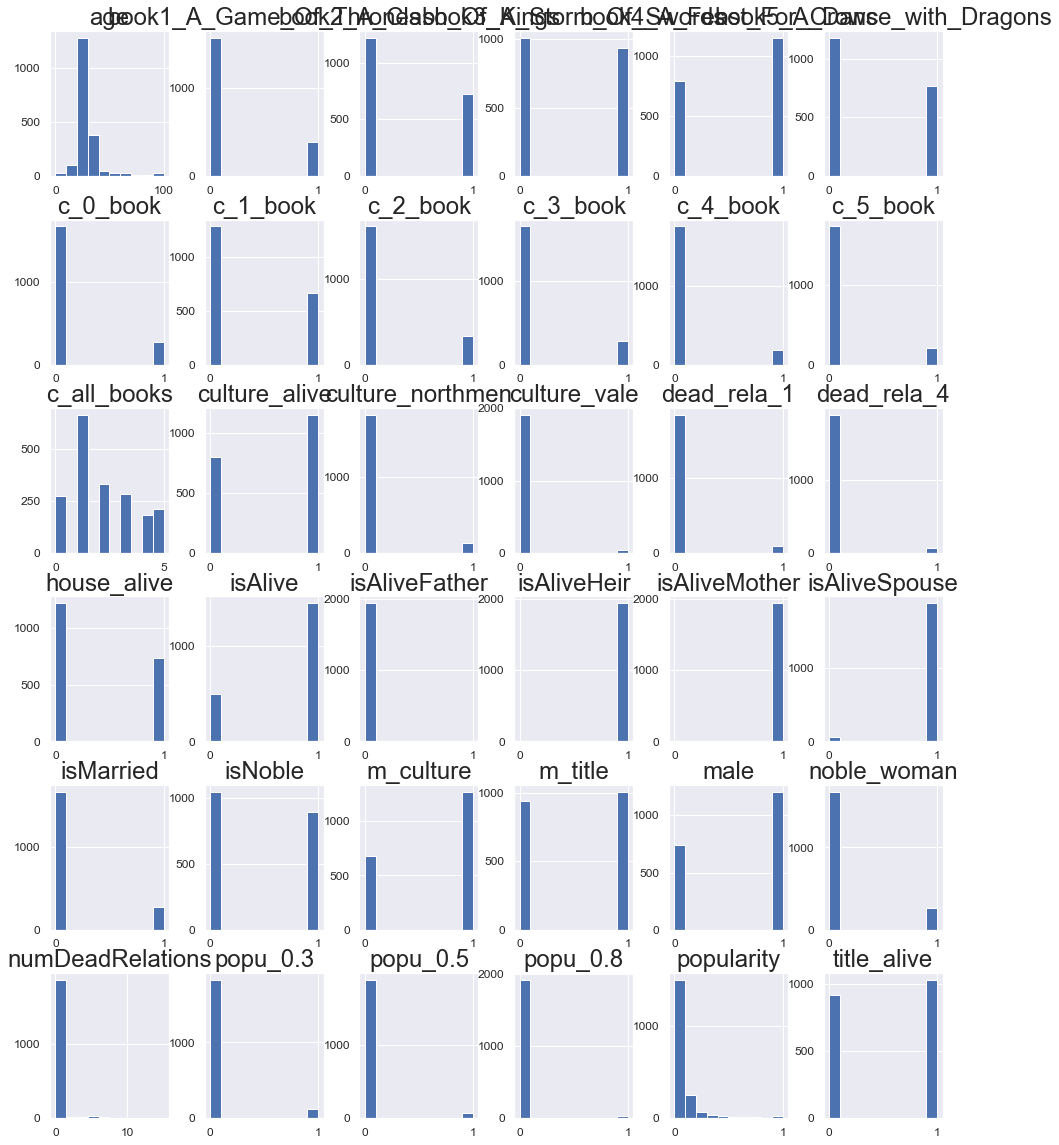

In [736]:
# We only want to graph some variables, let's create a df with the columns we want to see
got_hist = pd.DataFrame.copy(got_v1)
col_drop = ['S.No', 'name', 'culture', 'dateOfBirth', 'mother',
            'father', 'house','heir', 'spouse','m_mother',
            'm_father', 'm_heir', 'm_house', 'm_spouse']
got_hist = got_hist.drop(col_drop, 1)

# Now let's graph
got_hist.hist(figsize = (16, 20), bins = 10, xlabelsize = 12, ylabelsize = 12)

***

### Now let's rid some variables for our 1st aproach
We do this to make an easy 1st approach and create our first model<br>
Then we can see what happen and improve our model<br>
We will try to rid those who are less relevant to continue

In [737]:
# Create a new df with the drop variables
got_num = pd.DataFrame.copy(got_v1)
got_num = got_num.drop(['name', 'culture', 'dateOfBirth', 'mother',
                       'father', 'heir', 'house', 'spouse','m_mother',
                       'm_father', 'm_heir', 'm_spouse',
                        'isAliveMother', 'isAliveFather',
                       'isAliveHeir', 'isAliveSpouse', 'title'], axis=1)
got_num['popularity'].round(2)
print(got_num.info())


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1944 entries, (0, 0) to (1, 1945)
Data columns (total 34 columns):
S.No                          1944 non-null int64
male                          1944 non-null int64
book1_A_Game_Of_Thrones       1944 non-null int64
book2_A_Clash_Of_Kings        1944 non-null int64
book3_A_Storm_Of_Swords       1944 non-null int64
book4_A_Feast_For_Crows       1944 non-null int64
book5_A_Dance_with_Dragons    1944 non-null int64
isMarried                     1944 non-null int64
isNoble                       1944 non-null int64
age                           1944 non-null float64
numDeadRelations              1944 non-null int64
popularity                    1944 non-null float64
isAlive                       1944 non-null int64
m_title                       1944 non-null int64
m_culture                     1944 non-null int64
m_house                       1944 non-null int64
c_all_books                   1944 non-null int64
c_1_book                     

***Now we rid all the missing values***

***

### Let's see mow the correlations between them

In [738]:
# Let's create a correlation between the remaining variables
# Creation of the corr()
got_corr = got_num.corr()

In [739]:
# Print the corr() the var we want to predict: isAlive
print(got_corr['isAlive'].sort_values())

house_alive                  -0.519739
age                          -0.443387
dead_rela_1                  -0.196924
numDeadRelations             -0.190132
popularity                   -0.182971
c_0_book                     -0.177301
dead_rela_4                  -0.166361
popu_0.3                     -0.165333
male                         -0.149579
book1_A_Game_Of_Thrones      -0.144378
S.No                         -0.126518
popu_0.5                     -0.117329
book2_A_Clash_Of_Kings       -0.065078
isMarried                    -0.050834
isNoble                      -0.043925
c_4_book                     -0.024813
popu_0.8                     -0.022944
culture_northmen             -0.015320
c_5_book                     -0.008484
culture_vale                 -0.001102
book3_A_Storm_Of_Swords       0.006776
title_alive                   0.009333
c_3_book                      0.010951
book5_A_Dance_with_Dragons    0.033292
m_culture                     0.036161
m_house                  

***We see interesting results with good insights***<br>
***Insights:***
* If you appear in book 4 oyu have higher probability to be alive
* Age has a negative corr, what means that the older the worst
* Having many dead realations is not good to survive
* also being popular can cause your death
* The variables created using the dependent var (isAlive) have a strong corr() but only because of that, we are not going to use them.

<br>

***Let's continue with other analysis: heatmap***

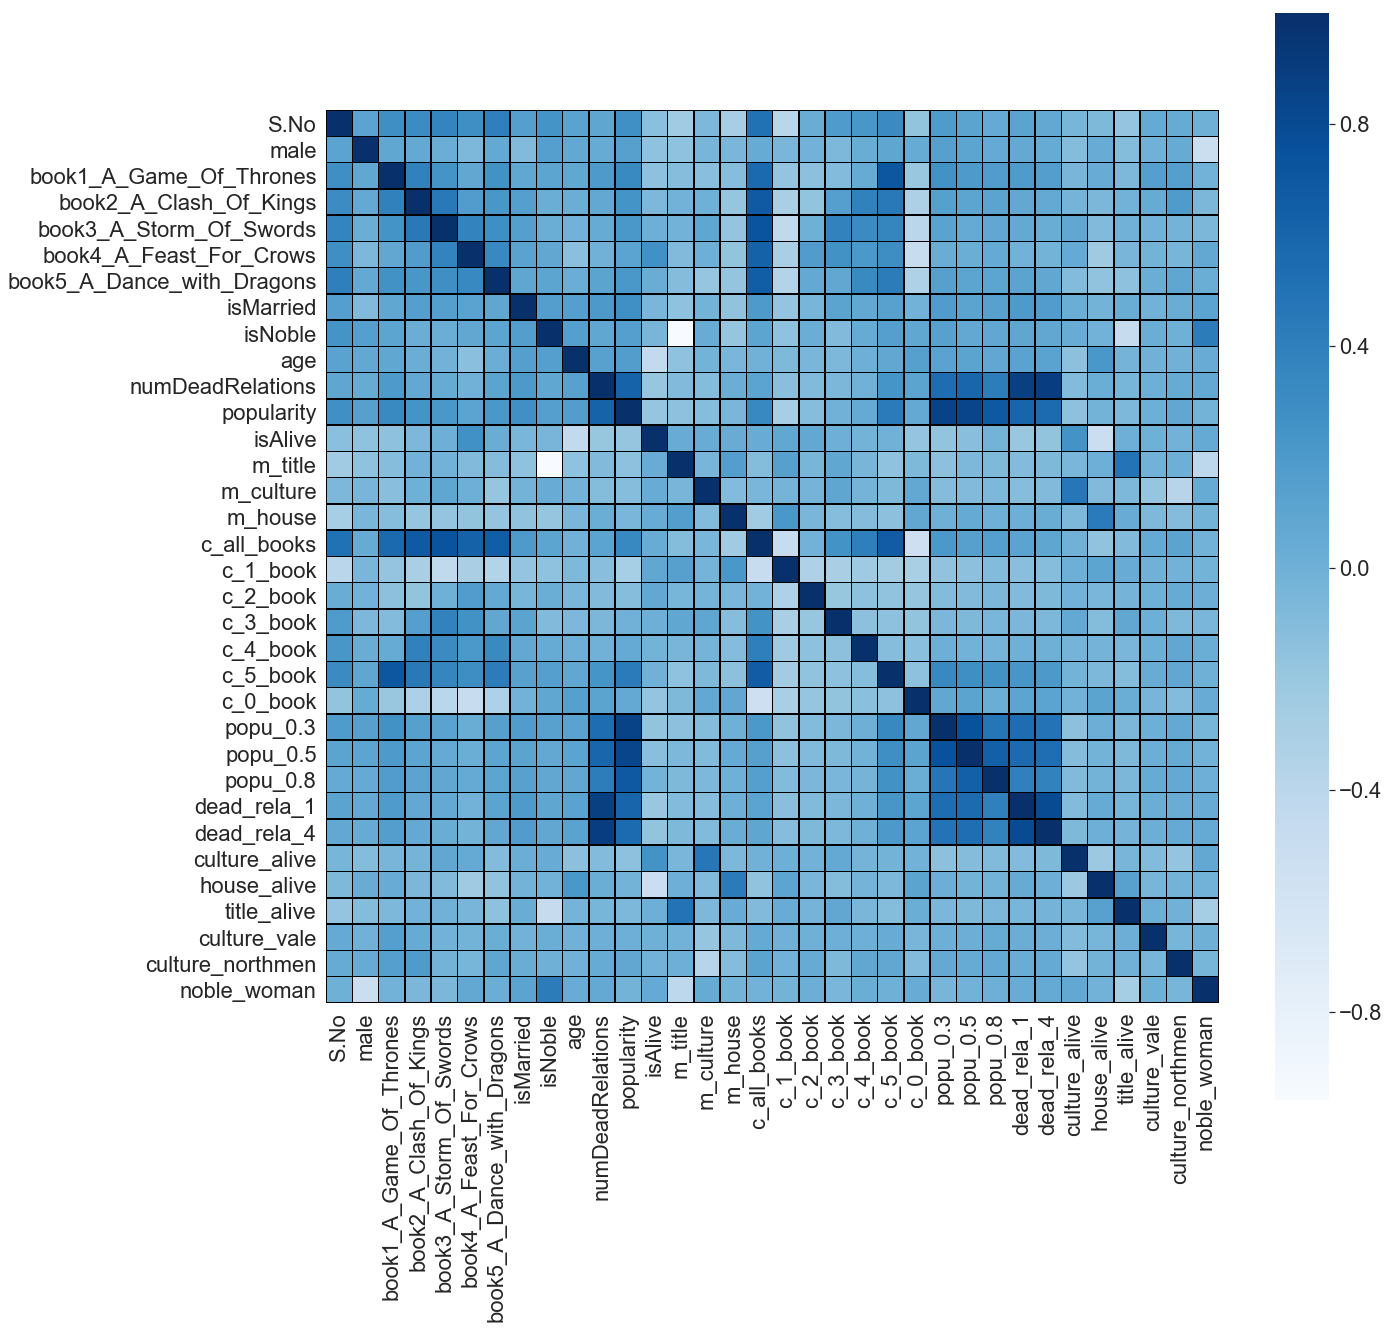

In [742]:
# now let's do the graph of the heatmap
fig, ax=plt.subplots(figsize=(20,20))
sns.set(font_scale=2)
sns.heatmap(got_corr,
            cmap = 'Blues',
            square = True,
            annot = False,
            linecolor = 'black',
            linewidths = 0.5)

#plt.savefig('correlation_matrix_all_var')
plt.show()

***

### Let's see some scatterplots
This is between the more relevant variables with isAlive

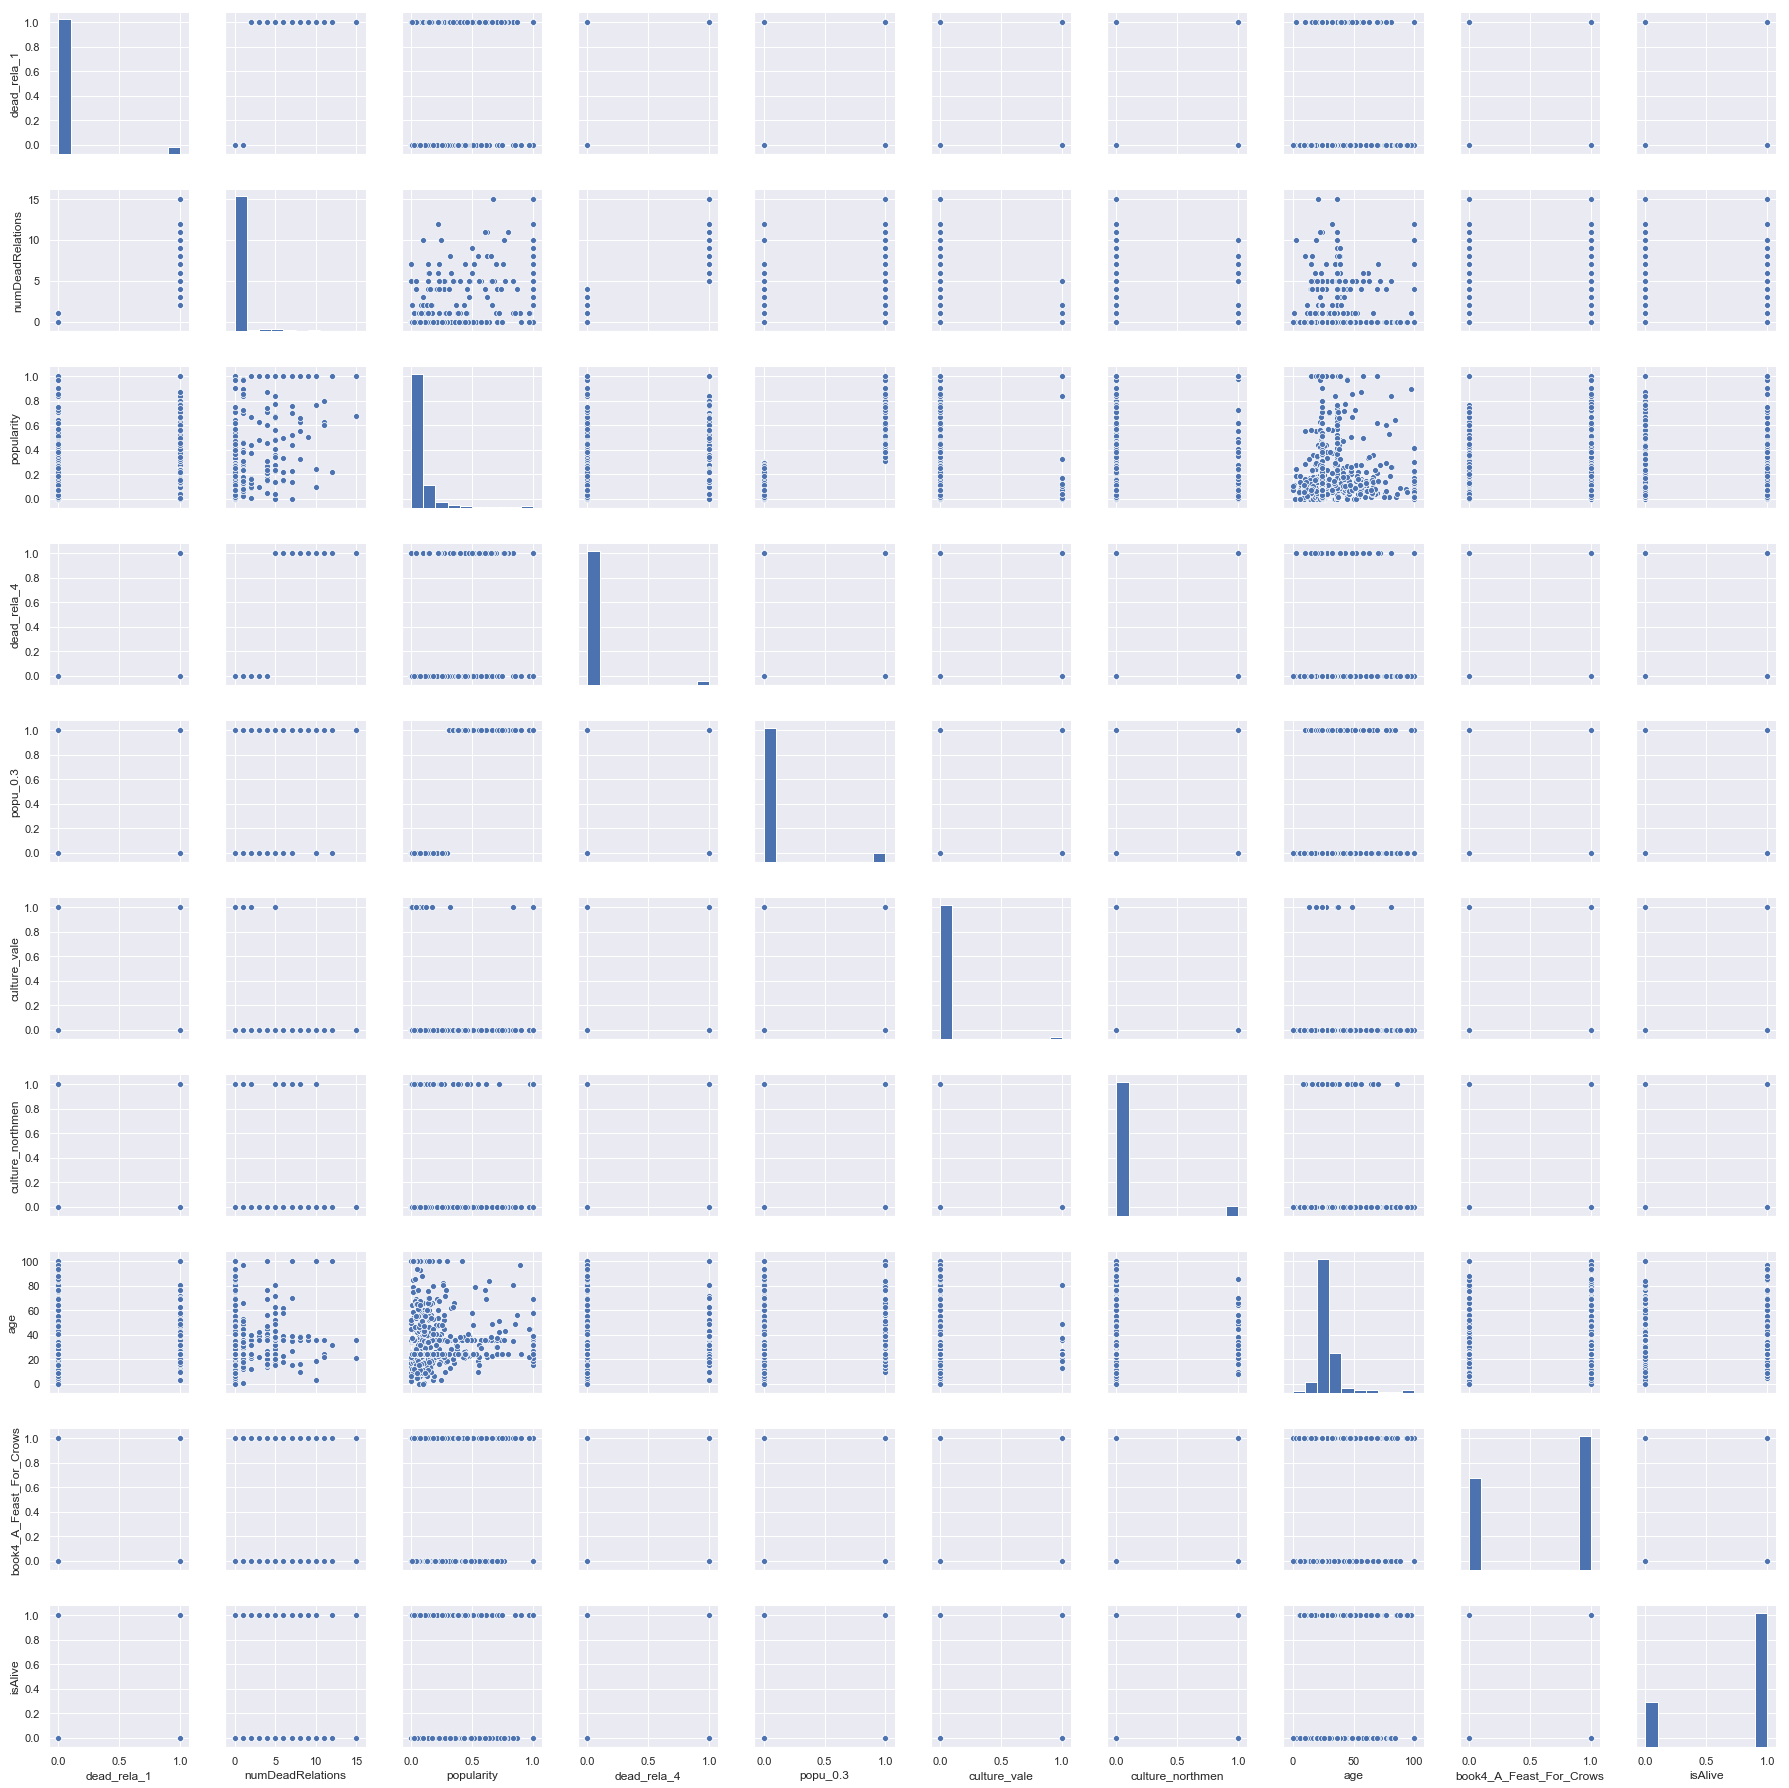

In [745]:
sns.set()
cols = ['dead_rela_1','numDeadRelations','popularity',
        'dead_rela_4','popu_0.3','culture_vale','culture_northmen',
        'age','book4_A_Feast_For_Crows', 'isAlive']
sns.pairplot(got_num[cols], height= 2.5)
plt.show();

### Let's focus only in some graphs that are interesting

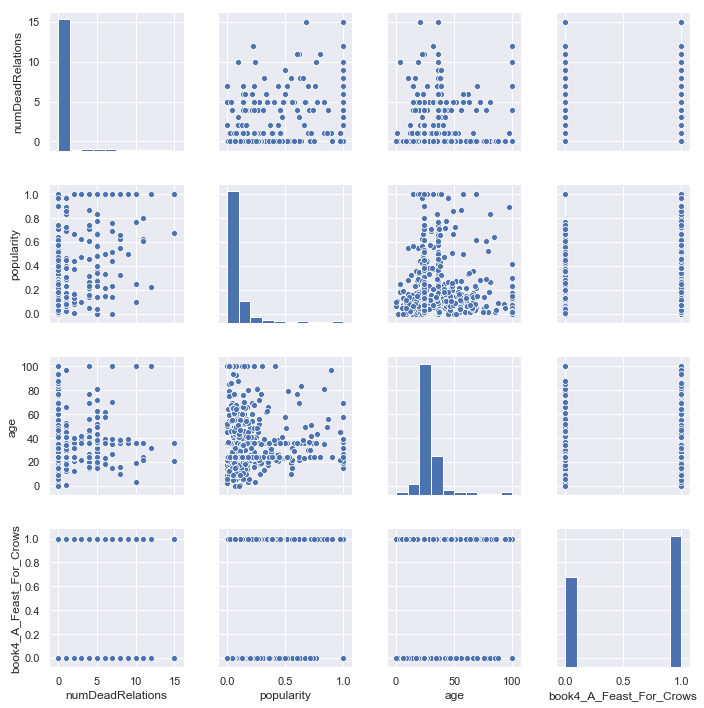

In [751]:
sns.set()
cols = ['numDeadRelations','popularity',
        'age', 'book4_A_Feast_For_Crows']
sns.pairplot(got_num[cols], height= 2.5)
plt.show();

In [752]:
"""
    Here we can highlight some insights:
    1) The most popular character are the one between 0 and 60. And being more popular
    is dangerous, more popular = more chances to be dead
    2) Also from the corr() we can see thar being older is worst for being alive.
    
"""

'\n    Here we can highlight some insights:\n    1) The most popular character are the one between 0 and 60. And being more popular\n    is dangerous, more popular = more chances to be dead\n    2) Also from the corr() we can see thar being older is worst for being alive.\n    \n'

/Users/valentinogaffuribedetta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


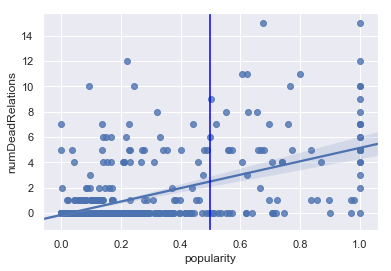

In [860]:
sns.regplot(x="popularity", y="numDeadRelations", data=got, color='b')
plt.axvline(.5, color='blue')

/Users/valentinogaffuribedetta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


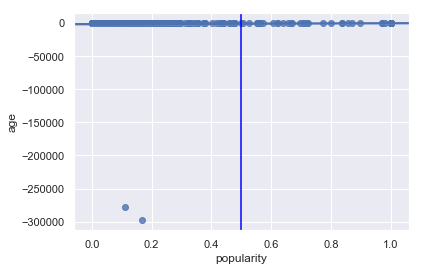

In [861]:
sns.regplot(x="popularity", y="age", data=got, color='b')
plt.axvline(.5, color='blue')

***

### Let's see the outliers

/Users/valentinogaffuribedetta/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


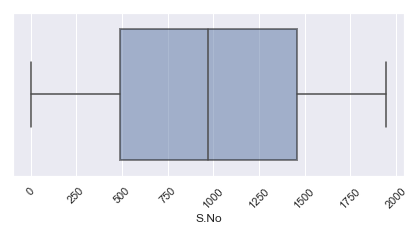

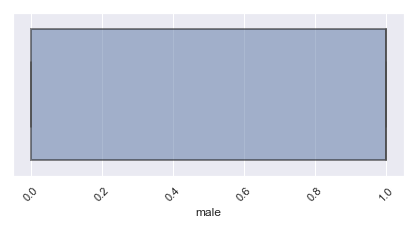

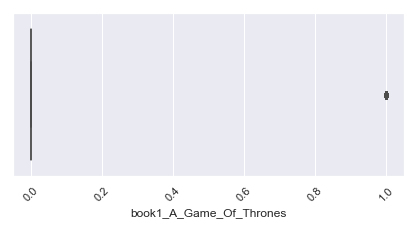

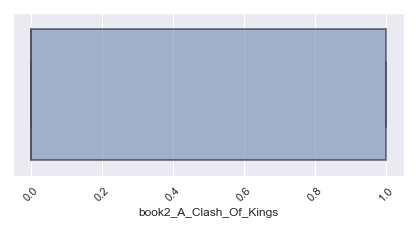

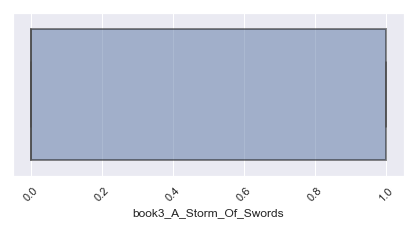

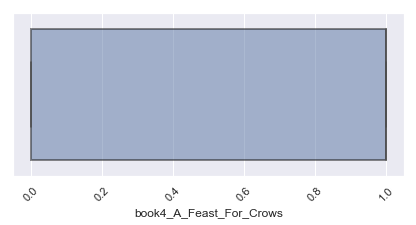

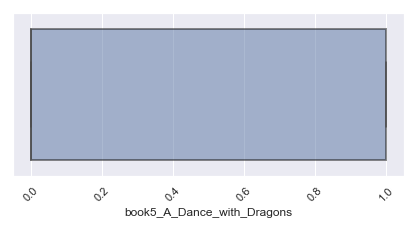

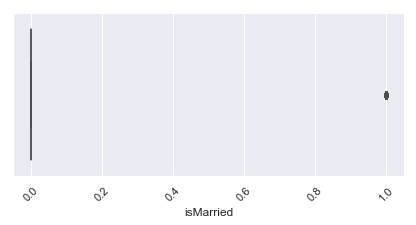

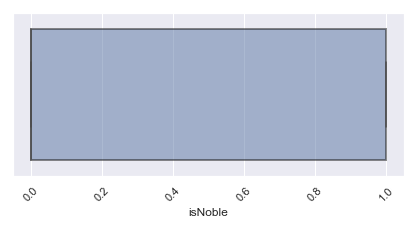

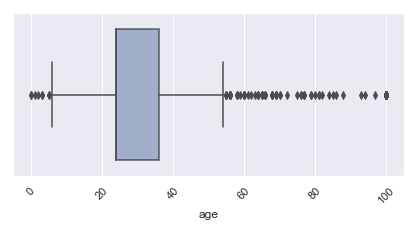

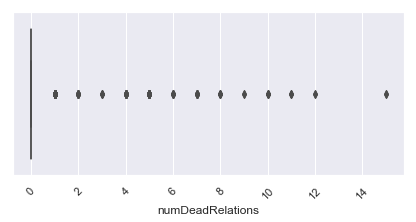

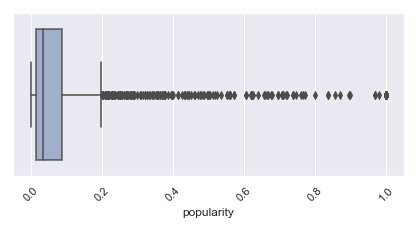

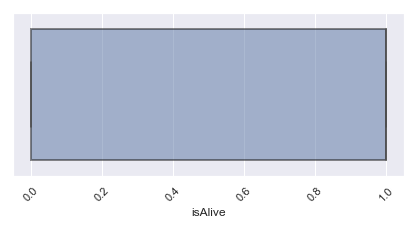

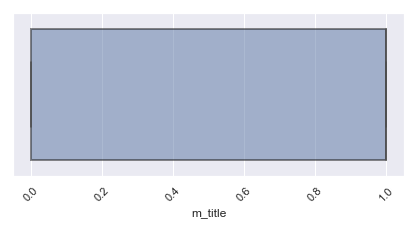

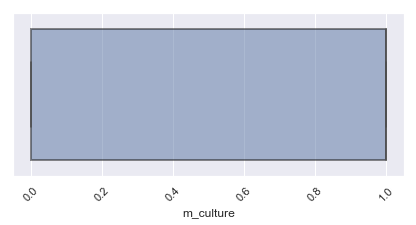

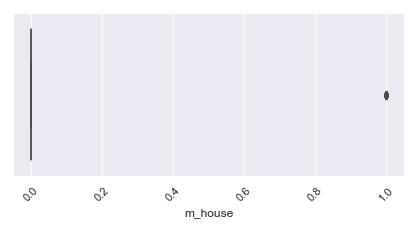

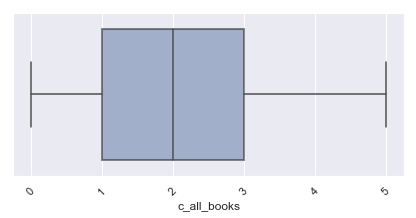

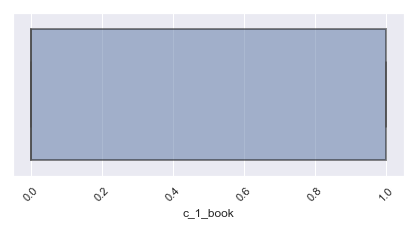

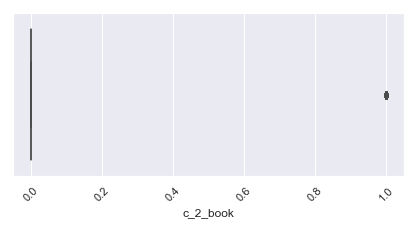

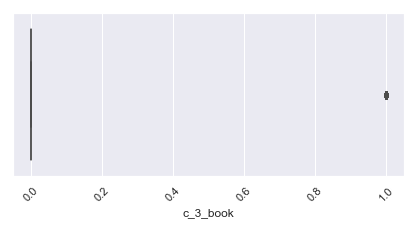

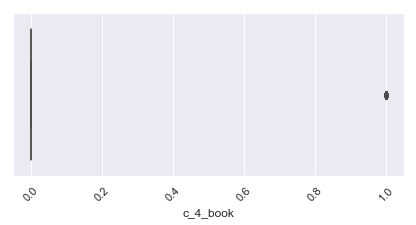

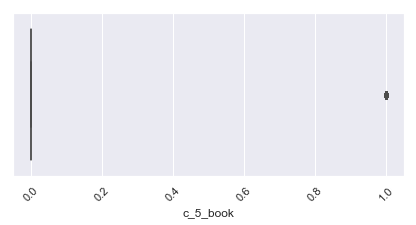

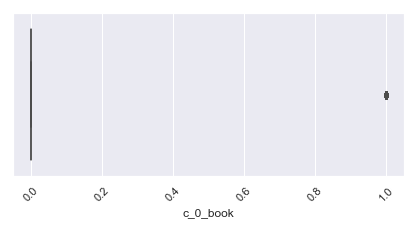

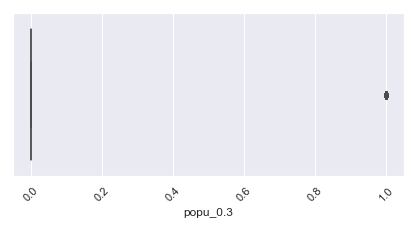

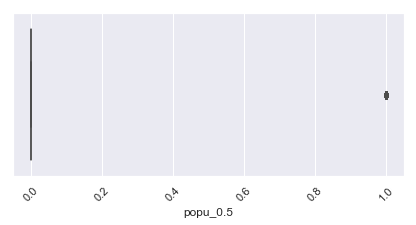

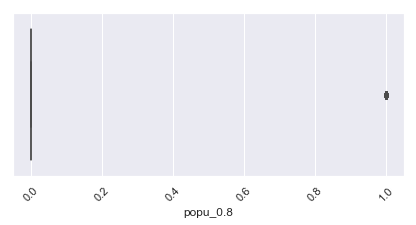

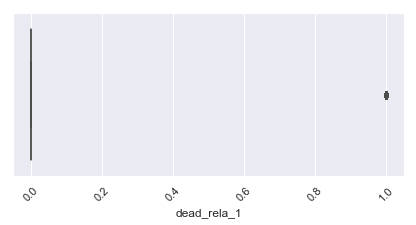

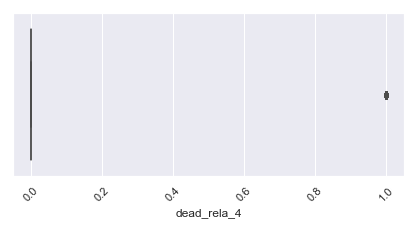

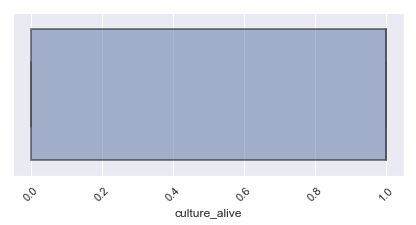

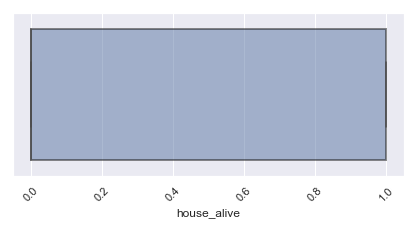

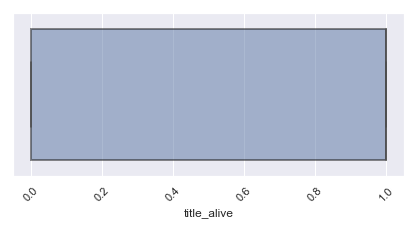

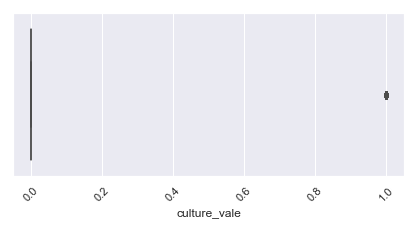

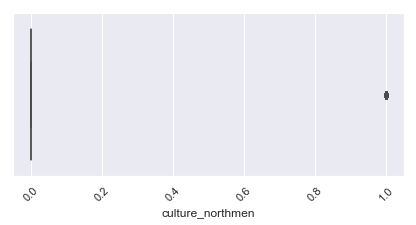

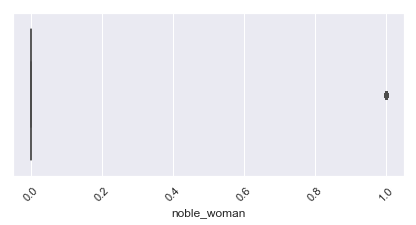

In [753]:
for col in got_num:
    sns.set()
    plt.figure(figsize = (7, 3))
    ax = sns.boxplot(x=got_num[col], data=got_num)
    plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
    plt.xticks(rotation=45)

***From the outlier analysis we see that is interesting the popularity variables***<br>
***The outliers begin upper than 0.2, there's a breakpoint***

***

# Model Creation
**The models that we are going to use are:**
* KNN Classification
* Random Forest
* GBM

7


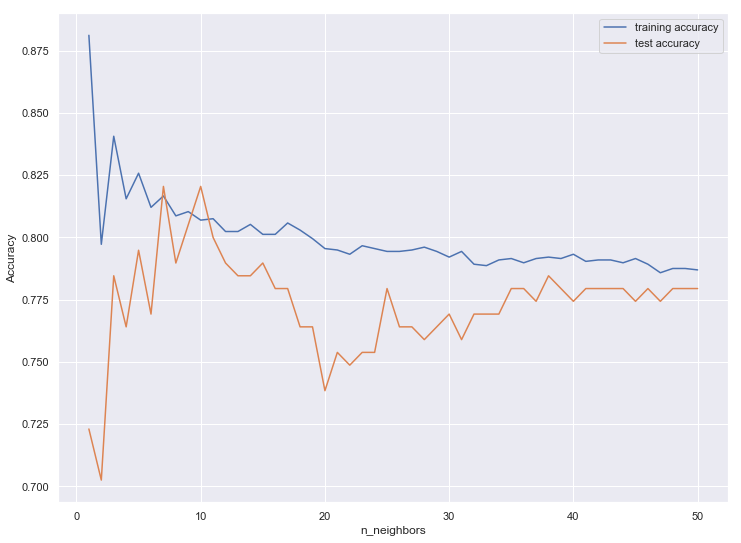

In [756]:
#####################
# KNN Classifier Basic
#####################

# Let's start creating a basic model
x = got[[  #'title', 
           #'culture',
           'male',
           #'heir',
           #'house', 
           'book1_A_Game_Of_Thrones',
           #'book2_A_Clash_Of_Kings', 
           #'book3_A_Storm_Of_Swords',
           'book4_A_Feast_For_Crows',
           #'book5_A_Dance_with_Dragons', 
           'isMarried',
           'isNoble',
           #'age',
           #'numDeadRelations',
           'popularity']]

y = got.loc[:, 'isAlive']

seed = 508
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y,shuffle=True,random_state=seed)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train.values.ravel())
    
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))

print(test_accuracy.index(max(test_accuracy)) + 1)
    
fig, ax = plt.subplots(figsize=(12,9))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()



In [757]:
########################
# The best results occur when k = 7.
########################

# Building a model with k = 7
knn_clf = KNeighborsClassifier(n_neighbors = 7)

# Fitting the model based on the training data

knn_clf_fit = knn_clf.fit(x_train, y_train)

#knn_clf_fit = knn_clf.fit(X_train, y_train.values.ravel())

print('Training Score', knn_clf_fit.score(x_train, y_train).round(4))
print('Testing Score:', knn_clf_fit.score(x_test, y_test).round(4))

knn_clf_pred = knn_clf_fit.predict(x_test)
knn_clf_pred_probabilities = knn_clf_fit.predict_proba(x_test)

#print(knn_clf_pred)
#print(knn_clf_pred_probabilities)

Training Score 0.8167
Testing Score: 0.8205


***Here we get a not bad result without using the features created***

[[ 24  26]
 [  9 136]]


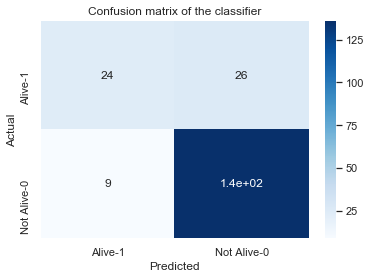

In [759]:
####################
# CONFUSION MATRIX 
####################            

print(confusion_matrix(y_true = y_test,
                       y_pred = knn_clf_pred))

labels = ['Alive-1', 'Not Alive-0']

cm = confusion_matrix(y_true = y_test,
                      y_pred = knn_clf_pred)


sns.heatmap(cm,
            annot = True,
            xticklabels = labels,
            yticklabels = labels,
            cmap = 'Blues')


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of the classifier')
plt.show()



In [760]:
# Here we can see that the result of the matrix is bigger where we said that it will
# not be alive, and he is alive (is better in this case to have more error here)

***

### Now let's create a Random Forest

In [761]:
################################
# Random Forest in scikit-learn (basic model)
###############################

# Let's create a basic model withput the features created first with the same vars

# Preparing a DataFrame based the the analysis above
x = got[[ 'male', 
           'book1_A_Game_Of_Thrones',
           'book4_A_Feast_For_Crows',
           'isMarried',
           'isNoble',
           'popularity']]

y = got.loc[:, 'isAlive']


# Now that we have a new set of X_variables, we need to run train/test
# split again

X_train, X_test, y_train, y_test = train_test_split(
            x,
            y,
            test_size = 0.10,
            random_state = 508)

In [762]:

# Following the same procedure as other scikit-learn modeling techniques

# Full forest using gini
full_forest_gini = RandomForestClassifier(n_estimators = 500,
                                     criterion = 'gini',
                                     max_depth = None,
                                     min_samples_leaf = 15,
                                     bootstrap = True,
                                     warm_start = False,
                                     random_state = 508)



# Full forest using entropy
full_forest_entropy = RandomForestClassifier(n_estimators = 500,
                                     criterion = 'entropy',
                                     max_depth = None,
                                     min_samples_leaf = 15,
                                     bootstrap = True,
                                     warm_start = False,
                                     random_state = 508)



# Fitting the models
full_gini_fit = full_forest_gini.fit(X_train, y_train)


full_entropy_fit = full_forest_entropy.fit(X_train, y_train)

In [763]:
# Scoring the gini model
print('Gini - Training Score:', full_gini_fit.score(X_train, y_train).round(4))
print('Gini - Testing Score:', full_gini_fit.score(X_test, y_test).round(4))


# Scoring the entropy model
print('Entropy - Training Score', full_entropy_fit.score(X_train, y_train).round(4))
print('Entropy - Testing Score:', full_entropy_fit.score(X_test, y_test).round(4))

Gini - Training Score: 0.7967
Gini - Testing Score: 0.8154
Entropy - Training Score 0.7967
Entropy - Testing Score: 0.8205


***Here we see the same results than before with the same variables***<br>
***Here we get the following (Entropy is better):***
* Gini - Training Score: 0.7967
* Gini - Testing Score: 0.8154
* Entropy - Training Score 0.7967
* Entropy - Testing Score: 0.8205

***Other thing that we see here is that the testing score is bigger than the training***<br>
***The data is not overfited***

***Let's see now the importance of every variable to take some conclusions***

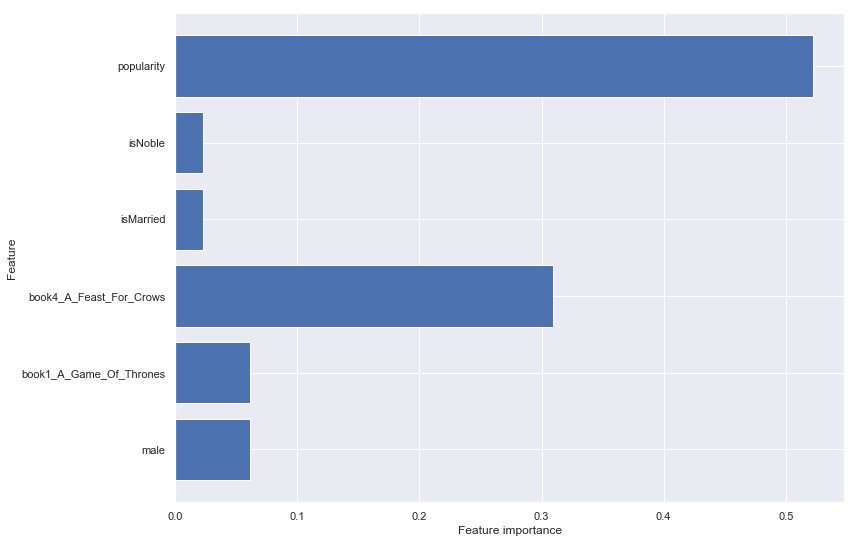

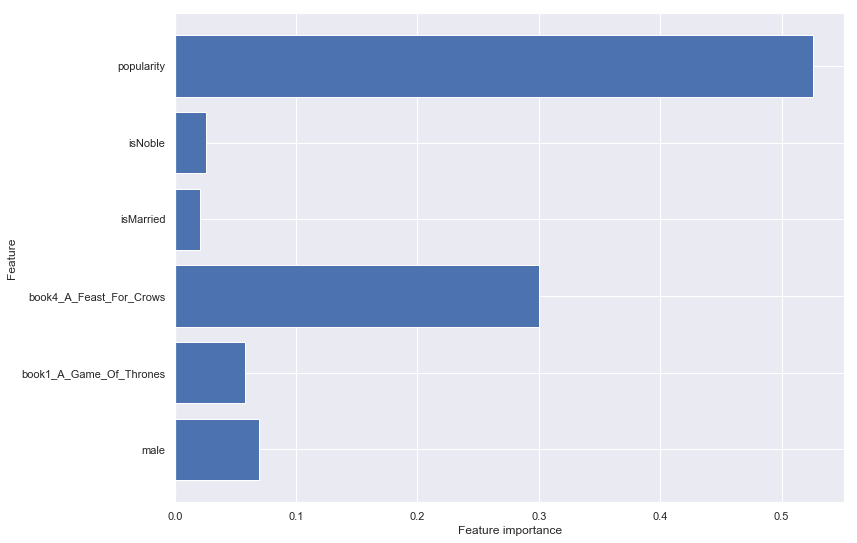

In [764]:
########################
# Feature importance function
########################

def plot_feature_importances(model, train = X_train, export = False):
    fig, ax = plt.subplots(figsize=(12,9))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

########################
        
plot_feature_importances(full_gini_fit,
                         train = X_train,
                         export = False)



plot_feature_importances(full_entropy_fit,
                         train = X_train,
                         export = False)

***Here we can see which variables are the most important for this model:***<br>
The most important are:
* popularity
* book4_A_Feast_For_Crows

Conclusion: try to be not so popular, but enough to appear in as many books as possible (and better if you are in book N 4)


3


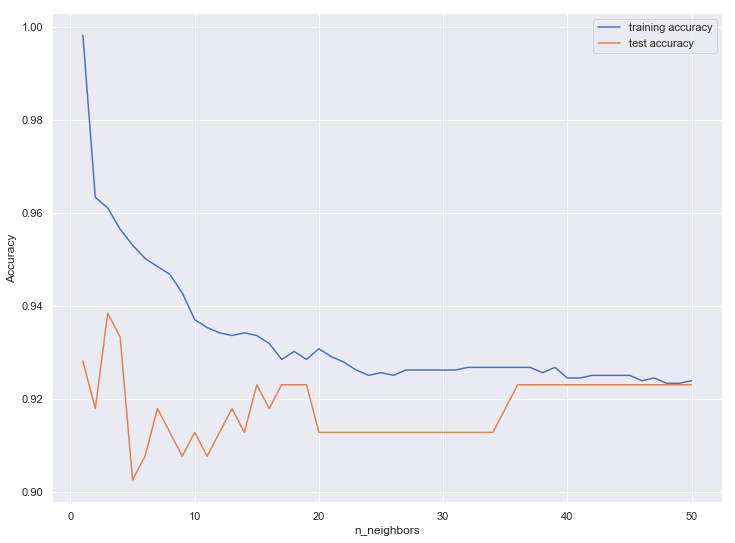

In [773]:
#######################################################################################
############################### IMPROVED MODELS WITH E.F ##############################


###############
#  KNN Classifier Improved
###############

# Let's pick the best variables for us to put in the model
# Let's start creating a basic model
x = got_v1[[ 'book1_A_Game_Of_Thrones',
         'book4_A_Feast_For_Crows',
         'age',
         'popularity',
         'noble_woman',
         'culture_vale',
         'culture_northmen',
         'c_5_book',
         'dead_rela_1']]

y = got_v1.loc[:, 'isAlive']


x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.1,
    stratify=y,
    shuffle=True,
    random_state=508)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train.values.ravel())
    
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))

print(test_accuracy.index(max(test_accuracy)) + 1)
    
fig, ax = plt.subplots(figsize=(12,9))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [780]:
########################
# The best results occur when k = 3.
########################

# Building a model with k = 3
knn_clf = KNeighborsClassifier(n_neighbors = 3)

# Fitting the model based on the training data

knn_clf_fit = knn_clf.fit(x_train, y_train)

#knn_clf_fit = knn_clf.fit(X_train, y_train.values.ravel())

print('Training Score', knn_clf_fit.score(x_train, y_train).round(4))
print('Testing Score:', knn_clf_fit.score(x_test, y_test).round(4))

knn_clf_pred = knn_clf_fit.predict(x_test)
knn_clf_pred_probabilities = knn_clf_fit.predict_proba(x_test)

#print(knn_clf_pred)
#print(knn_clf_pred_probabilities)

Training Score 0.9611
Testing Score: 0.9385


In [781]:
"""
    Here we can see how important are the new variables put it in the model.
    We get:
    Training Score 0.9611
    Testing Score: 0.9385
    
    We can see that is not too overfit, we have a good balance.
    Let's try to improve it in the following section.
"""

"\n    Here we can see how important are the new variables put it in the model.\n    We get:\n    Training Score 0.9611\n    Testing Score: 0.9385\n    \n    We can see that is not too overfit, we have a good balance.\n    Let's try to improve it in the following section.\n"

In [841]:
################################
# Random Forest in scikit-learn (IMPROVED)
###############################

# Let's create a basic model withput the features created first with the same vars

# Preparing a DataFrame based the the analysis above
x = got_v1[[ 'book1_A_Game_Of_Thrones',
         'book4_A_Feast_For_Crows',
         'age',
         'popularity',
         'noble_woman',
         'culture_vale',
         'culture_northmen',
         'c_5_book',
         'dead_rela_1']]

y = got_v1.loc[:, 'isAlive']


# Now that we have a new set of X_variables, we need to run train/test
# split again

x_train, x_test, y_train, y_test = train_test_split(
            x,
            y,
            test_size = 0.10,
            random_state = 508)

In [842]:

# Following the same procedure as other scikit-learn modeling techniques

# Full forest using gini
full_forest_gini = RandomForestClassifier(n_estimators = 500,
                                     criterion = 'gini',
                                     max_depth = None,
                                     min_samples_leaf = 15,
                                     bootstrap = True,
                                     warm_start = False,
                                     random_state = 508)



# Full forest using entropy
full_forest_entropy = RandomForestClassifier(n_estimators = 500,
                                     criterion = 'entropy',
                                     max_depth = None,
                                     min_samples_leaf = 15,
                                     bootstrap = True,
                                     warm_start = False,
                                     random_state = 508)



# Fitting the models
full_gini_fit = full_forest_gini.fit(x_train, y_train)


full_entropy_fit = full_forest_entropy.fit(x_train, y_train)

In [843]:
# Scoring the gini model
print('Gini - Training Score:', full_gini_fit.score(x_train, y_train).round(4))
print('Gini - Testing Score:', full_gini_fit.score(x_test, y_test).round(4))


# Scoring the entropy model
print('Entropy - Training Score', full_entropy_fit.score(x_train, y_train).round(4))
print('Entropy - Testing Score:', full_entropy_fit.score(x_test, y_test).round(4))

Gini - Training Score: 0.9451
Gini - Testing Score: 0.9436
Entropy - Training Score 0.9445
Entropy - Testing Score: 0.9282


***Here we get the following scores (Entropy is better):***
* Gini - Training Score: 0.9451
* Gini - Testing Score: 0.9436
* Entropy - Training Score 0.9445
* Entropy - Testing Score: 0.9282

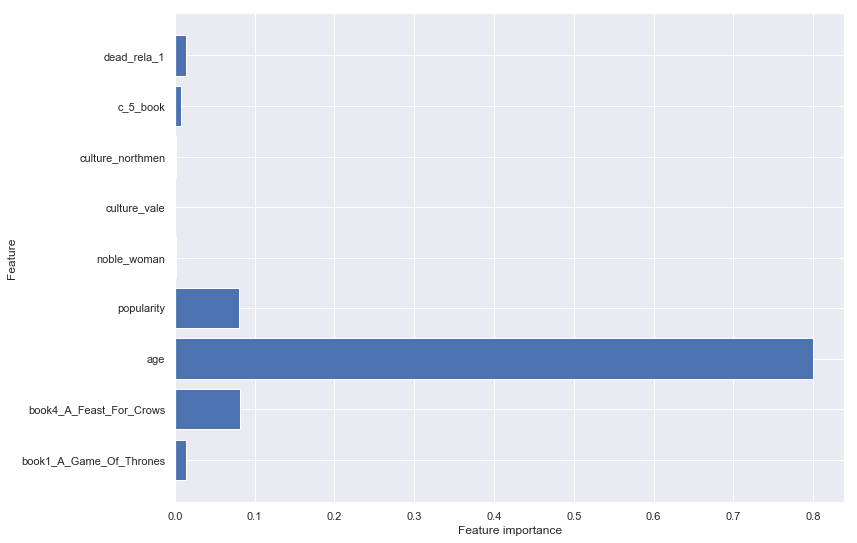

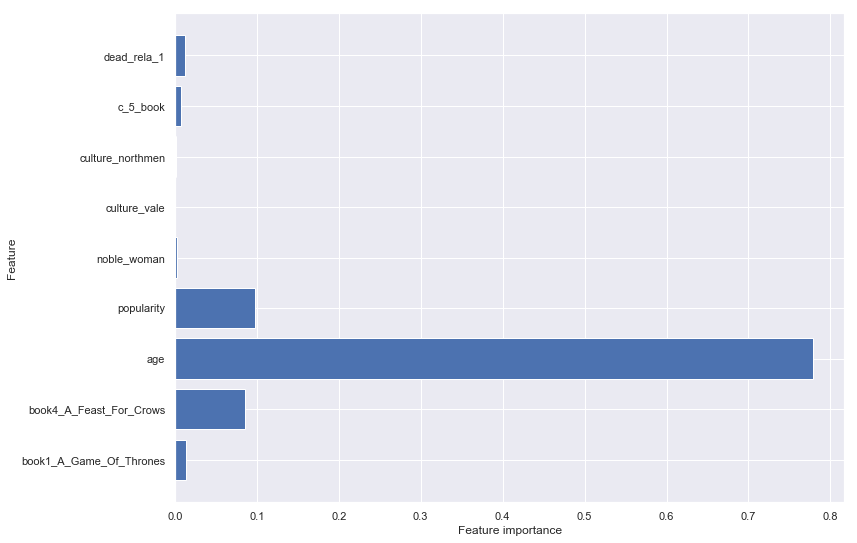

In [844]:
########################
# Feature importance function
########################

def plot_feature_importances(model, train = x_train, export = False):
    fig, ax = plt.subplots(figsize=(12,9))
    n_features = x_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

########################
        
plot_feature_importances(full_gini_fit,
                         train = x_train,
                         export = False)



plot_feature_importances(full_entropy_fit,
                         train = x_train,
                         export = False)

Here we can see the importance of the variable age (fill in with the mean) and also popularity.
<br>
Meaning that the older the bigger the chance of die and same with popularity. What is good is to appear in book N 4

### Now let's try to improve the model with RandomizedSearchCV
Is important to say that Randomized was chosen over Grid because of the time processing.
<br>
And because of the deadline to present, with more time Grid is better in terms of improvement.

In [845]:
##################
# Tuned Parameters
##################



#############################
# Applying RandomizedSearchCV in Random Forest
############################


# Creating a hyperparameter grid
estimator_space = pd.np.arange(100, 1350, 250)
leaf_space = pd.np.arange(1, 150, 15)
criterion_space = ['gini', 'entropy']
bootstrap_space = [True, False]
warm_start_space = [True, False]



param_grid = {'n_estimators' : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion' : criterion_space,
              'bootstrap' : bootstrap_space,
              'warm_start' : warm_start_space}

# Building the model object one more time
full_forest_grid = RandomForestClassifier(max_depth = None,
                                          random_state = 508)


In [846]:
gbm_grid_cv = RandomizedSearchCV(full_forest_grid,
                                 param_grid,
                                 cv = 3,
                                 n_iter = 50,
                                 scoring = 'roc_auc')



# Fit it to the training data
gbm_grid_cv.fit(x_train, y_train)



# Print the optimal parameters and best score
print("Tuned Rand Forest Parameter:", gbm_grid_cv.best_params_)
print("Tuned Rand Forest Accuracy:", gbm_grid_cv.best_score_.round(4))

Tuned Rand Forest Parameter: {'warm_start': True, 'n_estimators': 100, 'min_samples_leaf': 16, 'criterion': 'entropy', 'bootstrap': False}
Tuned Rand Forest Accuracy: 0.9812


***As we can see here we have the new parameters and the Tuned Rand Forest accuracy***
* Tuned Rand Forest Parameter: {'warm_start': True, 'n_estimators': 100, 'min_samples_leaf': 16, 'criterion': 'entropy', 'bootstrap': False}
* Tuned Rand Forest Accuracy: 0.9812
<br>

### Now let's create again the model with the Tuned Parameters

In [847]:
###############################################################################
# Random Forest in scikit-learn (improved version using RandomizedSearchCV)
###############################################################################


# Preparing a DataFrame based the the analysis above
x = got_v1[[ 'book1_A_Game_Of_Thrones',
         'book4_A_Feast_For_Crows',
         'age',
         'popularity',
         'noble_woman',
         'culture_vale',
         'culture_northmen',
         'c_5_book',
         'dead_rela_1']]

y = got_v1.loc[:, 'isAlive']


# Now that we have a new set of X_variables, we need to run train/test
# split again

x_train, x_test, y_train, y_test = train_test_split(
            x,
            y,
            test_size = 0.10,
            random_state = 508)

In [848]:

# Following the same procedure as other scikit-learn modeling techniques

# Full forest using gini
full_forest_gini = RandomForestClassifier(n_estimators = 100,
                                     criterion = 'entropy',
                                     max_depth = None,
                                     min_samples_leaf = 16,
                                     bootstrap = False,
                                     warm_start = True,
                                     random_state = 508)



# Fitting the models
full_gini_fit = full_forest_gini.fit(x_train, y_train)

# Predictions
full_gini_fit_predict = full_gini_fit.predict(x_test)

In [849]:
# Scoring the gini model
print('Entropy - Training Score:', full_gini_fit.score(x_train, y_train).round(4))
print('Entropy - Testing Score:', full_gini_fit.score(x_test, y_test).round(4))

Entropy - Training Score: 0.9503
Entropy - Testing Score: 0.9436


***Here we see an improvement in the accuracy of the model (test score):***
* Entropy - Training Score: 0.9503
* Entropy - Testing Score: 0.9436<br>

Using the Entropy is more accurate<br>
Here you can see how improving some parameters we can predict better if a character is going to die or not.

In [850]:
# Let's see the AUC for the improved Random Forest
rf_score = cross_val_score(full_forest_gini,
                           x,
                           y,
                           cv = 3, scoring= 'roc_auc')
mean_auc = pd.np.mean(rf_score).round(3)

print(mean_auc)

0.982


In [818]:
"""
    Here we see how was improved the accuracy of the model:
    AUC: 0.982
    Entropy - Training Score: 0.9503
    Entropy - Testing Score: 0.9436
"""

'\n    Here we see how was improved the accuracy of the model:\n    AUC: 0.987\n    Entropy - Training Score: 0.9994\n    Entropy - Testing Score: 1.0\n'

[[ 38   8]
 [  3 146]]


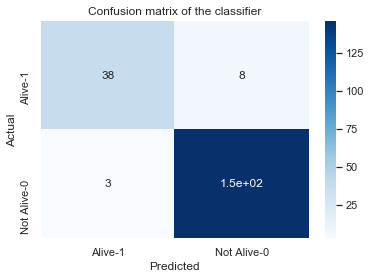

In [851]:
####################
# CONFUSION MATRIX 
####################            

print(confusion_matrix(y_true = y_test,
                       y_pred = full_gini_fit_predict))

labels = ['Alive-1', 'Not Alive-0']

cm = confusion_matrix(y_true = y_test,
                      y_pred = full_gini_fit_predict)


sns.heatmap(cm,
            annot = True,
            xticklabels = labels,
            yticklabels = labels,
            cmap = 'Blues')


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of the classifier')
plt.show()




Here we see that the majority of errors are in predicting wrong when we said someone os dead but actually is alive, is better to prevent than regret!

***

### Now let's try Gradient Boosted Machines
And also let's use less variables, and we will have the same predicting impact

In [819]:
###############################################################################
# Gradient Boosted Machines
###############################################################################


# Preparing a DataFrame based the the analysis above
x = got_v1[[ 'book1_A_Game_Of_Thrones',
         'book4_A_Feast_For_Crows',
         'age',
         'popularity',
         'noble_woman',
         'culture_vale',
         'culture_northmen',
         'c_5_book',
         'dead_rela_1']]

y = got_v1.loc[:, 'isAlive']


# Now that we have a new set of X_variables, we need to run train/test
# split again

X_train, X_test, y_train, y_test = train_test_split(
            x,
            y,
            test_size = 0.10,
            random_state = 508)

In [820]:
# Building a weak learner gbm
gbm_3 = GradientBoostingClassifier(loss = 'deviance',
                                  learning_rate = 1.5,
                                  n_estimators = 100,
                                  max_depth = 3,
                                  criterion = 'friedman_mse',
                                  warm_start = False,
                                  random_state = 508,
                                  )


"""
    Notice above that we are using friedman_mse as the criterion. Friedman
    proposed that instead of focusing on one MSE value for the entire tree,
    the algoirthm should localize its optimal MSE for each region of the tree.
"""


gbm_basic_fit = gbm_3.fit(X_train, y_train)


gbm_basic_predict = gbm_basic_fit.predict(X_test)


# Training and Testing Scores
print('Training Score', gbm_basic_fit.score(X_train, y_train).round(4))
print('Testing Score:', gbm_basic_fit.score(X_test, y_test).round(4))


gbm_basic_train = gbm_basic_fit.score(X_train, y_train)
gmb_basic_test  = gbm_basic_fit.score(X_test, y_test)



Training Score 0.9971
Testing Score: 0.9128


***We can see here lower perfomance than the Random Forest and overfit:***
* Training Score 0.9971
* Testing Score: 0.9128
<br>

Here we can see that this model is not better, because the score is lower and the gap bigger

In [821]:
# Let's see the AUC
gbm_score = cross_val_score(gbm_3,
                           got_data,
                           got_target,
                           cv = 3, scoring= 'roc_auc')
mean_auc = pd.np.mean(knn_score).round(3)

print(mean_auc)

0.893


We can also see a lower performance in the AUC

In this case, because the difference of the accuracy and the gap between the Traninig set and the Testing set is lower, we are going to use and save the results of the Random Forest model

***

## Let's save the results
The model that better perform was the Random Forest

In [852]:
########################
# Saving Results of Random Forest and GMB
########################

# Saving best model scores
model_scores_df = pd.DataFrame({'RF_Score': [gbm_grid_cv.best_score_],
                                'GBM_Score': [gmb_basic_test]})


model_scores_df.to_excel("Ensemble_Model_Results.xlsx")



# Saving model predictions

model_predictions_df = pd.DataFrame({'Actual' : y_test,
                                     'RF_Predicted': full_gini_fit_predict,
                                     'GBM_Predicted': gbm_basic_predict})


model_predictions_df.to_excel("Ensemble_Model_Predictions.xlsx")